In [ ]:
%%capture
!pip install seaborn

Based on [Onset-based Segmentation with Backtracking](https://musicinformationretrieval.com/onset_segmentation.html)

In [19]:
%matplotlib inline
import seaborn
import numpy as np, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (13, 5)

In [4]:
_TGR = "/home/jim/Playing/mfa_alignments/pmg-out/MI0001RCAlphaBet_0001.TextGrid"
_AUD = "/home/jim/Playing/mfa-corp/pmg/MI0001RCAlphaBet_0001.wav"

In [5]:
from praatio import textgrid
tg = textgrid.openTextgrid(_TGR, False)

In [8]:
x, sr = librosa.load(_AUD)

In [28]:
ends = [tg.tierDict['phones'].entryList[0].start] + [end.end for end in tg.tierDict['phones'].entryList]

In [27]:
phones = [end.label for end in tg.tierDict['phones'].entryList]

In [12]:
frames = librosa.time_to_frames(ends, sr)

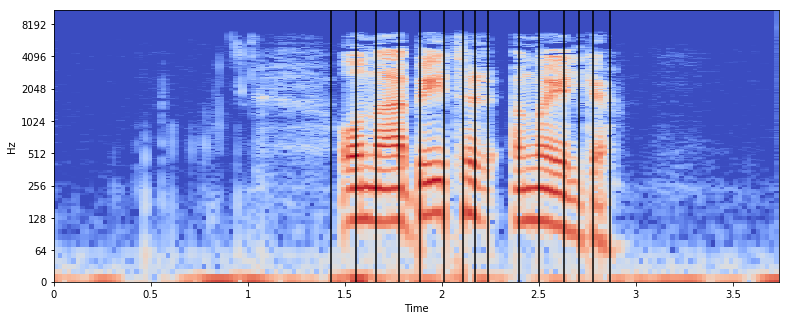

In [33]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(np.abs(S))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')
#plt.vlines(ends, 0, ends[-1], color='k', linestyles='solid')
for xc in ends:
    plt.axvline(x=xc, color='k')